In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
from Preprossering.PreprosseringPipeline import preprossingPipeline
import pickle
from Villads.PCA_TSNE_classes import scale_data
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

Inteactive ploting function  
Responseble Andreas 

In [3]:
path_pca=r'C:\Users\Andreas\Desktop\KID\Fagproject\PCA_TSNE/PCA.sav'
path_pca_features=r'C:\Users\Andreas\Desktop\KID\Fagproject\PCA_TSNE/pca_features.npy'
path_tsne=r'C:\Users\Andreas\Desktop\KID\Fagproject\PCA_TSNE/TSNE.sav'
path_tsne_features=r'C:\Users\Andreas\Desktop\KID\Fagproject\PCA_TSNE/tsne_features.npy'
get_data=preprossingPipeline(BC_datapath=r"C:\Users\Andreas\Desktop\KID\Fagproject\Data\BC")


paths found for loading


In [4]:
pca = pickle.load(open(path_pca, 'rb'))
tsne = pickle.load(open(path_tsne, 'rb'))
tsne_features=np.load(path_tsne_features)
pca_features=np.load(path_pca_features)

In [38]:
pca_path=r"C:\Users\Andreas\Desktop\KID\Fagproject\PCA_TSNE_01"
feature_vectors,labels,filenames,window_id= get_data.make_label( make_from_names=None, quality=[1,10], is_usable=None, max_files=20,path = pca_path)

In [39]:
scaled_feature_vectors=scale_data(feature_vectors)
pca_vectors=pca.transform(scaled_feature_vectors)

In [29]:
plot_pca(pca_vectors,labels,considered_classes=np.unique(labels))

NameError: name 'plot_pca' is not defined

In [41]:
pca1=0
pca2=1
#make data frame
df=(pd.DataFrame(window_id,columns=["file","window"]))
df[int(pca1)]=pca_vectors[:,pca1]
df[int(pca2)]=pca_vectors[:,pca2]
df["label"]=labels
df["index"]=df.index
fig=px.scatter(df,x=int(pca1),y=int(pca2),color="label",hover_data=["file","window","index"])
fig.show()

Extracting EDF parameters from C:\Users\Andreas\Desktop\KID\Fagproject\Data\BC\data_farrahtue_EEG\Original participant EEGs\30Aug_updated channels\sbs2data_2018_08_30_19_37_22_286 Part2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 66431  =      0.000 ...   518.992 secs...
Setting up band-stop filter from 47 - 53 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 47.00
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 46.75 Hz)
- Upper passband edge: 53.00 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 53.25 Hz)
- Filter length: 845 samples (6.602 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one

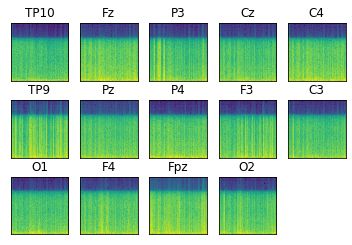

In [36]:
idx=356
get_data.plot_window(window_id[idx][0],window_id[idx][1])

In [28]:
len(window_id)

1097